# Dataset Dummy : Water Temperature dan Turbidity  
Nama : Farhan Nawwafal Pramudia  
Team : 7  
Role : Data

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana rata-rata suhu per hari selama bulan November 2023 ?
- Pertanyaan 2 : Bagaimana rata-rata kekeruhan air per hari selama November 2023 ?

## Menyiapkan semua library yang dibutuhkan

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca dataset `temp_turb_df`

In [76]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project PABCL 2025 Tim 7/farhan-exercise/Water_Temperature_Turbidity_Data.csv', delimiter=',')
df.head()

,Timestamp,Water_Temperature_C,Turbidity_NTU
0,2023-01-01 00:00:00,13.982258,3.696572
1,2023-01-01 01:00:00,17.129941,3.566647
2,2023-01-01 02:00:00,19.103928,1.126960
3,2023-01-01 03:00:00,22.236695,4.159168
4,2023-01-01 04:00:00,25.456022,0.019835


### Assesing Data

Menilai tabel `temp_turb_df`

In [77]:
# Mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            10000 non-null  object 
 1   Water_Temperature_C  10000 non-null  float64
 2   Turbidity_NTU        10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Insight : Berdasarkan informasi di atas, tidak ada data yang null, namun tipe data dari Timestamp masih kurang tepat. Hal ini akan diperbaiki pada proses Cleaning Data

In [78]:
# Mengecek summary statistik dataset
df.describe()

,Water_Temperature_C,Turbidity_NTU
count,10000.000000,10000.000000
mean,15.101295,3.228379
std,7.109117,2.227754
min,5.000000,0.000000
25%,8.208789,1.655042
50%,15.061432,3.051622
75%,21.910346,4.465937
max,28.937958,15.000000


In [79]:
# Memastikan tidak ada data yang null
print(df.isna().sum())

Timestamp              0
Water_Temperature_C    0
Turbidity_NTU          0
dtype: int64


In [80]:
# Mengecek jumlah duplikat data
print(f'Jumlah duplikasi data : {df.duplicated().sum()}')

Jumlah duplikasi data : 0


### Cleaning Data

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            10000 non-null  object 
 1   Water_Temperature_C  10000 non-null  float64
 2   Turbidity_NTU        10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [82]:
# Memperbaiki tipe data Timestamp menjadi datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            10000 non-null  datetime64[ns]
 1   Water_Temperature_C  10000 non-null  float64       
 2   Turbidity_NTU        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 234.5 KB


Insight : Sekarang, tipe datanya sudah benar dan datanya sudah clean

## Exploratory Data Analysis (EDA)

### Explore rata-rata suhu per hari selama bulan November 2023

In [84]:
# Mengambil data pada bulan november
nov_df = df[df['Timestamp'].dt.month == 11]
nov_df.head()

,Timestamp,Water_Temperature_C,Turbidity_NTU
7296,2023-11-01 00:00:00,17.636740,0.774089
7297,2023-11-01 01:00:00,16.732595,0.071096
7298,2023-11-01 02:00:00,18.323621,4.157185
7299,2023-11-01 03:00:00,24.392529,3.784369
7300,2023-11-01 04:00:00,20.979546,4.521658


In [97]:
# Menambahkan kolom 'Day' sebagai tanggal dari Timestamp
nov_df.loc[:, 'Day'] = pd.to_datetime(nov_df['Timestamp']).dt.day
nov_df.head()

,Timestamp,Water_Temperature_C,Turbidity_NTU,Day
7296,2023-11-01 00:00:00,17.636740,0.774089,1
7297,2023-11-01 01:00:00,16.732595,0.071096,1
7298,2023-11-01 02:00:00,18.323621,4.157185,1
7299,2023-11-01 03:00:00,24.392529,3.784369,1
7300,2023-11-01 04:00:00,20.979546,4.521658,1


In [98]:
# Mengubah value day menjadi hari
nov_df.loc[:, 'Day'] = nov_df['Day'].apply(lambda x: ['Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu', 'Senin', 'Selasa'][(x - 1) % 7])
nov_df.head()

,Timestamp,Water_Temperature_C,Turbidity_NTU,Day
7296,2023-11-01 00:00:00,17.636740,0.774089,Rabu
7297,2023-11-01 01:00:00,16.732595,0.071096,Rabu
7298,2023-11-01 02:00:00,18.323621,4.157185,Rabu
7299,2023-11-01 03:00:00,24.392529,3.784369,Rabu
7300,2023-11-01 04:00:00,20.979546,4.521658,Rabu


In [99]:
nov_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 7296 to 8015
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            720 non-null    datetime64[ns]
 1   Water_Temperature_C  720 non-null    float64       
 2   Turbidity_NTU        720 non-null    float64       
 3   Day                  720 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 44.3+ KB


In [109]:
# Mengambil data suhu per hari selama bulan November
avg_tmp_per_day = nov_df.groupby('Day')['Water_Temperature_C'].mean().reset_index()

In [110]:
# Mengurutkan nama hari
hari_urut = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
avg_tmp_per_day['Day'] =  pd.Categorical(avg_tmp_per_day['Day'], categories=hari_urut)
avg_tmp_per_day = avg_tmp_per_day.sort_values('Day')
avg_tmp_per_day = avg_tmp_per_day.reset_index(drop=True)
avg_tmp_per_day.rename(columns={'Water_Temperature_C' : 'Average_Day_Temperature(°C)'})

,Day,Average_Day_Temperature(°C)
0,Senin,15.077617
1,Selasa,15.075247
2,Rabu,15.147889
3,Kamis,15.270170
4,Jumat,14.980661
5,Sabtu,15.169936
6,Minggu,15.124091


### Explore rata-rata kekeruhan air per jam selama bulan November

In [111]:
# Mengelompokkan data kekeruhan air perjam bulan november
avg_turb_per_day = nov_df.groupby('Day')['Turbidity_NTU'].mean().reset_index()

In [112]:
# Mengurutkan nama hari
avg_turb_per_day['Day'] =  pd.Categorical(avg_turb_per_day['Day'], categories=hari_urut)
avg_turb_per_day = avg_turb_per_day.sort_values('Day')
avg_turb_per_day = avg_turb_per_day.reset_index(drop=True)
avg_turb_per_day.rename(columns={'Turbidity_NTU' : 'Average_Day_Turbidity'})

,Day,Average_Day_Turbidity
0,Senin,3.384065
1,Selasa,3.472813
2,Rabu,3.037959
3,Kamis,3.188099
4,Jumat,2.985019
5,Sabtu,3.252986
6,Minggu,3.064309


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana rata-rata suhu per hari selama bulan November 2023 ?

In [113]:
# Fungsi menampilkan label suhu
def showLabelsTemperature(your_data, x_column, y_column):
  for i in range(len(your_data)):
      plt.text(
          x=your_data[x_column].iloc[i] + 0.8,  # Mengambil value untuk sumbu x
          y=your_data[y_column].iloc[i] + 0.4,  # Offset label
          s=f"{your_data[y_column].iloc[i]:.2f}",  # Format angka
          ha='center', fontsize=9
      )

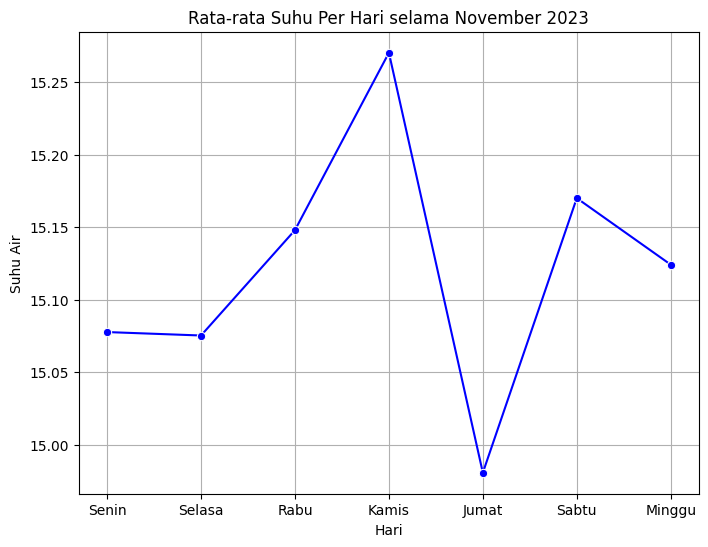

In [114]:
plt.figure(figsize=(8, 6))

# Membuat line chart dengan Seaborn
sns.lineplot(
    data=avg_tmp_per_day,
    x='Day',
    y='Water_Temperature_C',
    marker='o',
    color='b'
)

# showLabelsTemperature(avg_tmp_per_day, 'Day', 'Water_Temperature_C')

plt.title('Rata-rata Suhu Per Hari selama November 2023')
plt.xlabel('Hari')
plt.ylabel('Suhu Air')
plt.grid(True)

plt.show()

### Pertanyaan 2 :  Bagaimana rata-rata kekeruhan air per hari selama November 2023 ?

In [115]:
# Fungsi menampilkan label turbidity
def showLabelsTurbidity(your_data, x_column, y_column):
  for i in range(len(your_data)):
      plt.text(
          x=your_data[x_column].iloc[i] + 0.3,  # Mengambil value untuk sumbu x
          y=your_data[y_column].iloc[i] + 0.009,  # Offset label
          s=f"{your_data[y_column].iloc[i]:.2f}",  # Format angka
          ha='center', fontsize=9
      )

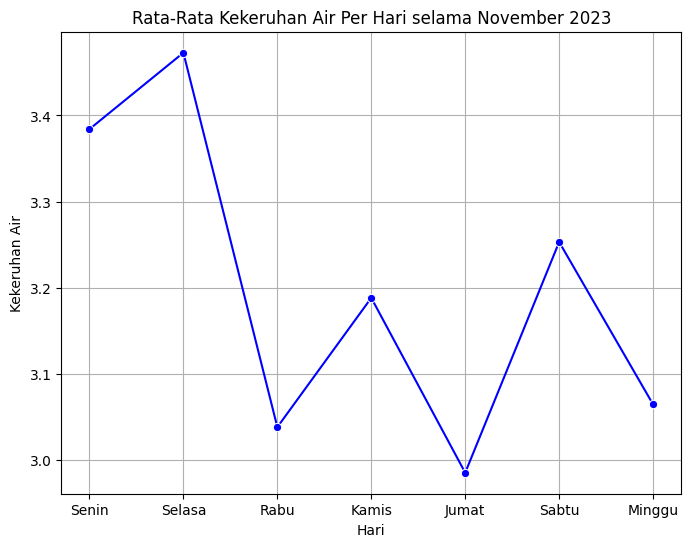

In [116]:
plt.figure(figsize=(8, 6))

sns.lineplot(
    data=avg_turb_per_day,
    x='Day',
    y='Turbidity_NTU',
    marker='o',
    color='b'
)

plt.title('Rata-Rata Kekeruhan Air Per Hari selama November 2023')
plt.xlabel('Hari')
plt.ylabel('Kekeruhan Air')
plt.grid(True)
plt.show()

## Conclusion

- Conclusion pertanyaan 1 : Rata-rata suhu air per hari selama bulan November 2023, cenderung banyak naik suhunya.
- Conclusion pertanyaan 2 : Rata-rata kekeruhan air per hari selama bulan November 2023, cenderung banyak turunnya.

In [117]:
df.to_csv('final_data.csv', index=False)